In [97]:
import sys
sys.path.append("../")

In [98]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from load_data import load_md_from_file
from simulator.simulator import Sim
from simulator.utils import get_pnl
from strategies.symetrical import BestPosStrategy

PATH_TO_FILE = '../md/btcusdt_Binance_LinearPerpetual/'
T = pd.Timedelta(10, 'm').delta

C:\Users\igorl\AppData\Local\Temp\ipykernel_17560\2825818616.py:11: FutureWarning: Timedelta.delta is deprecated and will be removed in a future version.
  T = pd.Timedelta(10, 'm').delta


In [99]:
md = load_md_from_file(path=PATH_TO_FILE, T=T)

In [100]:
latency = pd.Timedelta(10, 'ms').delta
md_latency = pd.Timedelta(10, 'ms').delta

sim = Sim(md, latency, md_latency)

C:\Users\igorl\AppData\Local\Temp\ipykernel_17560\3629183269.py:1: FutureWarning: Timedelta.delta is deprecated and will be removed in a future version.
  latency = pd.Timedelta(10, 'ms').delta
C:\Users\igorl\AppData\Local\Temp\ipykernel_17560\3629183269.py:2: FutureWarning: Timedelta.delta is deprecated and will be removed in a future version.
  md_latency = pd.Timedelta(10, 'ms').delta


In [101]:
delay = pd.Timedelta(0.1, 's').delta
hold_time = pd.Timedelta(10, 's').delta
strategy = BestPosStrategy(delay, hold_time)

C:\Users\igorl\AppData\Local\Temp\ipykernel_17560\3181842992.py:1: FutureWarning: Timedelta.delta is deprecated and will be removed in a future version.
  delay = pd.Timedelta(0.1, 's').delta
C:\Users\igorl\AppData\Local\Temp\ipykernel_17560\3181842992.py:2: FutureWarning: Timedelta.delta is deprecated and will be removed in a future version.
  hold_time = pd.Timedelta(10, 's').delta


In [102]:
%%time
sim = Sim(md, latency, md_latency)
trades_list, md_list, updates_list, all_orders = strategy.run(sim)

CPU times: total: 5.06 s
Wall time: 5.17 s


In [103]:
%%time
df = get_pnl(updates_list)

CPU times: total: 297 ms
Wall time: 303 ms


In [104]:
dt = pd.to_datetime(df.receive_ts)

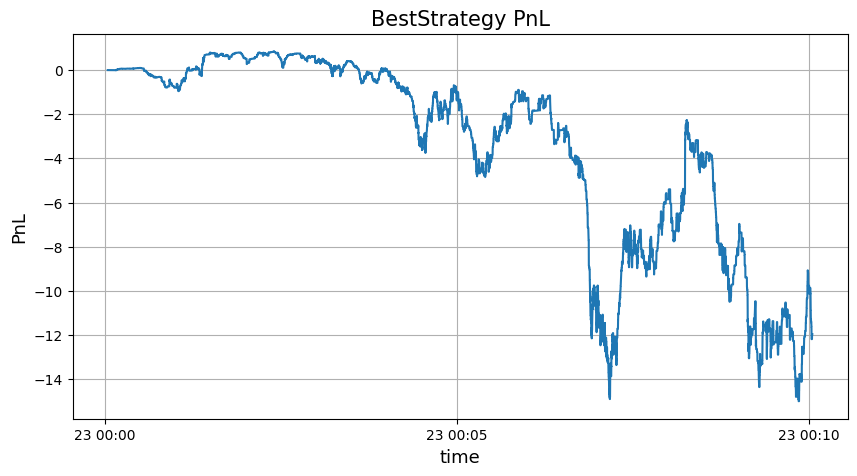

In [105]:
plt.figure(figsize=(10, 5))
plt.plot(dt, df.total, '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("PnL", fontsize=13)
plt.title("BestStrategy PnL", fontsize=15)
plt.grid()
plt.show()


In [114]:
from simulator.utils import OwnTrade
l = []
anon_trades = []

for i in updates_list:
    if isinstance(i, OwnTrade):
        l.append(i)
    else: 
        if i.trade:
            anon_trades.append(i.trade)


10116

In [117]:
round(len(l) / len(anon_trades), 2)


0.17